# ECA57 Circuit Visualization Demo

This notebook demonstrates ECA57 circuit visualization with:
- **Circuit diagram**: Gates colored by topological level
- **Skeleton graph**: Same colors showing collision structure
- **Topological ordering**: Push gates left until they collide

In [1]:
import sys
sys.path.insert(0, '../src')

from utils.eca57_viz import (
    random_eca57_circuit,
    random_eca57_identity,
    build_skeleton_graph,
    get_topological_levels,
    order_push_left,
    reorder_circuit,
    gates_collide,
    visualize_circuit_and_skeleton
)

import matplotlib.pyplot as plt
%matplotlib inline

## 1. Random Circuit Visualization

Generate a random 5-wire, 6-gate circuit and visualize it.

In [5]:
# Generate random circuit
circuit = random_eca57_circuit(width=20, gate_count=50)

print("Gate details:")
for i, g in enumerate(circuit.gates()):
    print(f"  g{i}: target={g.target}, ctrl1={g.ctrl1} (high), ctrl2={g.ctrl2} (low)")

Gate details:
  g0: target=18, ctrl1=2 (high), ctrl2=17 (low)
  g1: target=0, ctrl1=5 (high), ctrl2=18 (low)
  g2: target=10, ctrl1=4 (high), ctrl2=15 (low)
  g3: target=8, ctrl1=5 (high), ctrl2=14 (low)
  g4: target=9, ctrl1=1 (high), ctrl2=8 (low)
  g5: target=0, ctrl1=5 (high), ctrl2=7 (low)
  g6: target=9, ctrl1=13 (high), ctrl2=19 (low)
  g7: target=7, ctrl1=3 (high), ctrl2=19 (low)
  g8: target=4, ctrl1=14 (high), ctrl2=2 (low)
  g9: target=3, ctrl1=14 (high), ctrl2=7 (low)
  g10: target=7, ctrl1=6 (high), ctrl2=9 (low)
  g11: target=18, ctrl1=3 (high), ctrl2=15 (low)
  g12: target=16, ctrl1=19 (high), ctrl2=5 (low)
  g13: target=10, ctrl1=12 (high), ctrl2=1 (low)
  g14: target=13, ctrl1=3 (high), ctrl2=9 (low)
  g15: target=11, ctrl1=4 (high), ctrl2=5 (low)
  g16: target=15, ctrl1=16 (high), ctrl2=18 (low)
  g17: target=2, ctrl1=3 (high), ctrl2=5 (low)
  g18: target=19, ctrl1=17 (high), ctrl2=11 (low)
  g19: target=19, ctrl1=4 (high), ctrl2=15 (low)
  g20: target=8, ctrl1=18 (hi

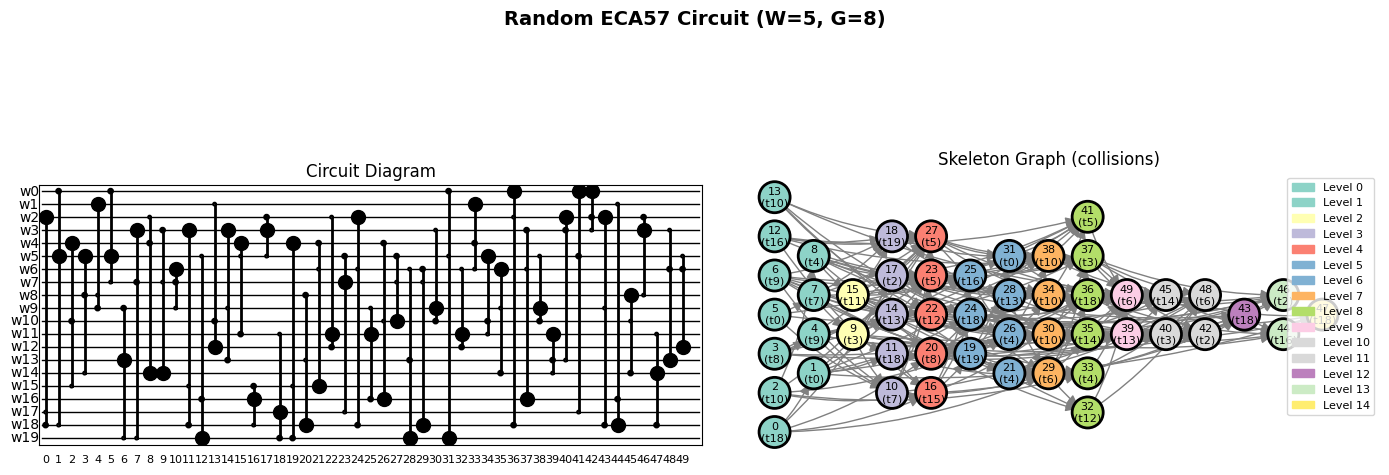

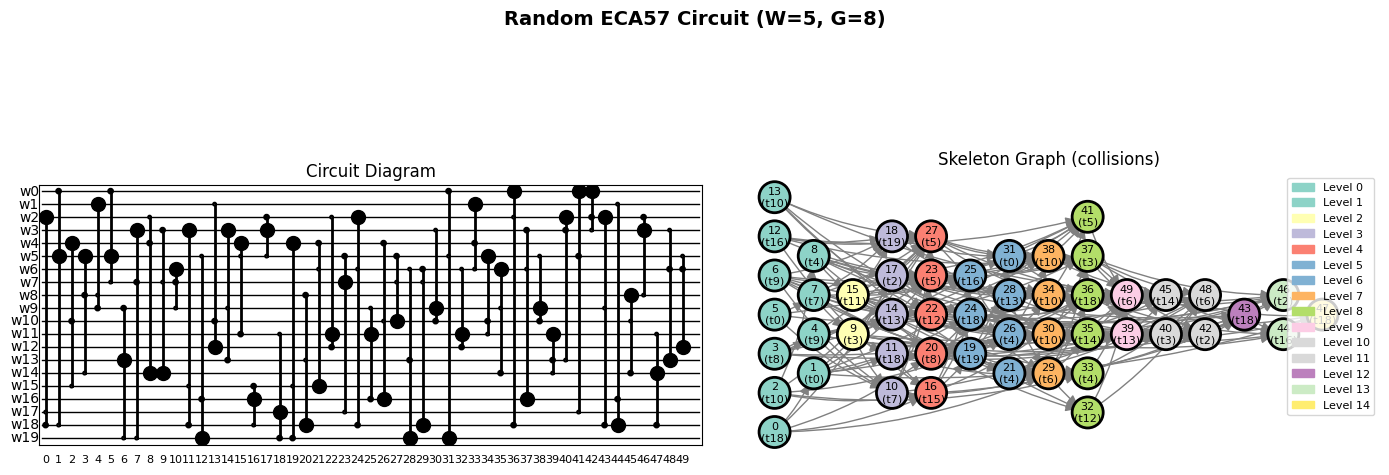

In [6]:
# Dual visualization: Circuit + Skeleton Graph
visualize_circuit_and_skeleton(circuit, title="Random ECA57 Circuit (W=5, G=8)")

## 2. Understanding the Skeleton Graph

The skeleton graph shows which gates **collide** (don't commute):
- **Nodes** = Gates
- **Edges** = Collision (one gate's target is in other's controls)
- **Colors** = Topological levels (gates in same level can be reordered freely)

In [7]:
# Build skeleton graph
G = build_skeleton_graph(circuit)
levels = get_topological_levels(G)

print("Skeleton Graph:")
print(f"  Nodes: {list(G.nodes())}")
print(f"  Edges (collisions): {list(G.edges())}")
print()
print("Topological Levels:")
for i, level in enumerate(levels):
    gates_in_level = [circuit.gates()[j] for j in level]
    print(f"  Level {i}: {level}")
    for idx in level:
        g = circuit.gates()[idx]
        print(f"    g{idx}: ({g.target}, {g.ctrl1}, {g.ctrl2})")

Skeleton Graph:
  Nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
  Edges (collisions): [(0, 1), (0, 16), (0, 17), (0, 20), (0, 29), (1, 11), (1, 23), (1, 24), (1, 27), (1, 36), (1, 41), (1, 47), (2, 8), (2, 16), (2, 26), (2, 27), (2, 33), (3, 4), (3, 23), (3, 27), (3, 41), (3, 45), (3, 46), (4, 10), (4, 14), (4, 25), (4, 30), (4, 35), (4, 38), (5, 7), (5, 10), (5, 36), (5, 41), (6, 10), (6, 14), (6, 18), (6, 19), (6, 25), (6, 30), (6, 35), (6, 38), (6, 43), (7, 9), (7, 18), (7, 19), (7, 23), (7, 27), (7, 29), (7, 40), (8, 15), (8, 17), (8, 19), (8, 35), (8, 42), (8, 45), (8, 46), (9, 10), (9, 11), (9, 14), (9, 17), (9, 30), (9, 35), (9, 42), (9, 46), (10, 23), (10, 27), (10, 29), (10, 48), (11, 16), (11, 20), (11, 29), (11, 40), (12, 16), (12, 18), (12, 23), (12, 27), (12, 37), (12, 41), (13, 22), (13, 26), (13, 27), (13, 32), (13, 45), 

## 3. Collision Analysis

Two gates **collide** if one's target is in the other's controls:
```
g1.target ∈ {g2.ctrl1, g2.ctrl2}  OR  g2.target ∈ {g1.ctrl1, g1.ctrl2}
```

In [8]:
gates = circuit.gates()
print("Collision pairs:")
for i in range(len(gates)):
    for j in range(i+1, len(gates)):
        if gates_collide(gates[i], gates[j]):
            g1, g2 = gates[i], gates[j]
            reasons = []
            if g1.target in (g2.ctrl1, g2.ctrl2):
                reasons.append(f"g{i}.target={g1.target} in g{j}.controls")
            if g2.target in (g1.ctrl1, g1.ctrl2):
                reasons.append(f"g{j}.target={g2.target} in g{i}.controls")
            print(f"  g{i} → g{j}: {', '.join(reasons)}")

Collision pairs:
  g0 → g1: g0.target=18 in g1.controls
  g0 → g16: g0.target=18 in g16.controls
  g0 → g17: g17.target=2 in g0.controls
  g0 → g20: g0.target=18 in g20.controls
  g0 → g29: g0.target=18 in g29.controls
  g0 → g42: g42.target=2 in g0.controls
  g0 → g44: g0.target=18 in g44.controls
  g0 → g46: g46.target=2 in g0.controls
  g1 → g11: g11.target=18 in g1.controls
  g1 → g23: g23.target=5 in g1.controls
  g1 → g24: g24.target=18 in g1.controls
  g1 → g27: g27.target=5 in g1.controls
  g1 → g36: g1.target=0 in g36.controls, g36.target=18 in g1.controls
  g1 → g41: g1.target=0 in g41.controls, g41.target=5 in g1.controls
  g1 → g42: g1.target=0 in g42.controls
  g1 → g43: g43.target=18 in g1.controls
  g1 → g47: g47.target=18 in g1.controls
  g2 → g8: g8.target=4 in g2.controls
  g2 → g16: g16.target=15 in g2.controls
  g2 → g21: g21.target=4 in g2.controls
  g2 → g26: g2.target=10 in g26.controls, g26.target=4 in g2.controls
  g2 → g27: g2.target=10 in g27.controls
  g2 → 

## 4. Identity Circuit Visualization

Generate a random identity circuit and visualize its structure.

In [9]:
# Generate random identity (pairs of G·G)
identity = random_eca57_identity(width=4, gate_count=8)

print(f"Is identity: {identity.is_identity()}")
print()
print("Gates:")
for i, g in enumerate(identity.gates()):
    print(f"  g{i}: ({g.target}, {g.ctrl1}, {g.ctrl2})")

Is identity: True

Gates:
  g0: (3, 0, 1)
  g1: (3, 0, 1)
  g2: (2, 0, 1)
  g3: (2, 0, 1)
  g4: (2, 0, 3)
  g5: (2, 0, 3)
  g6: (0, 3, 1)
  g7: (0, 3, 1)


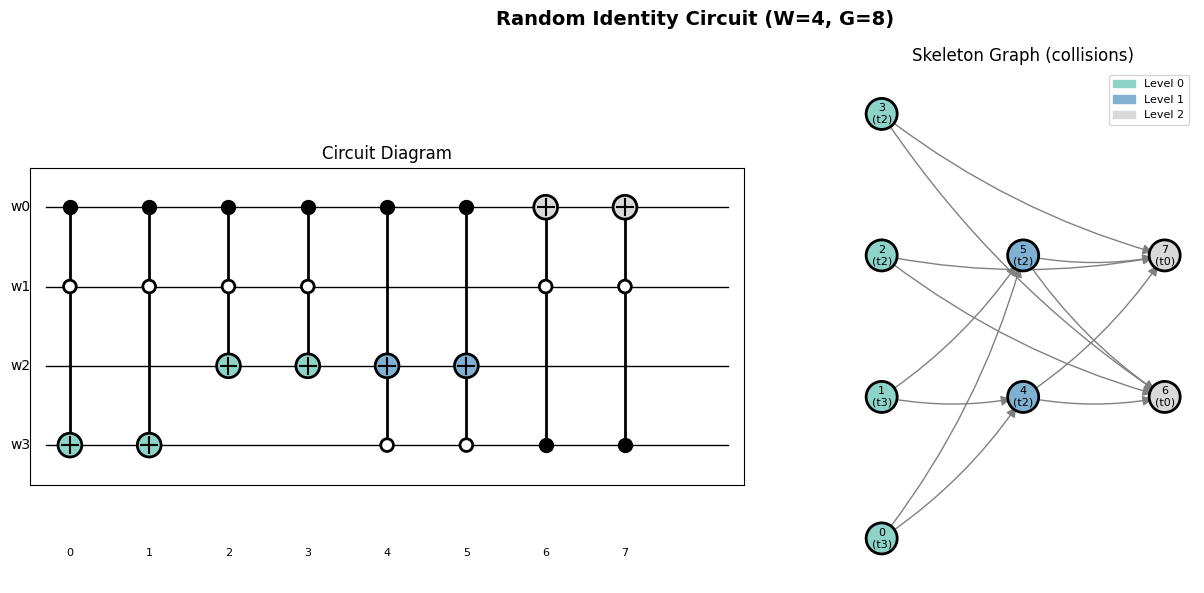

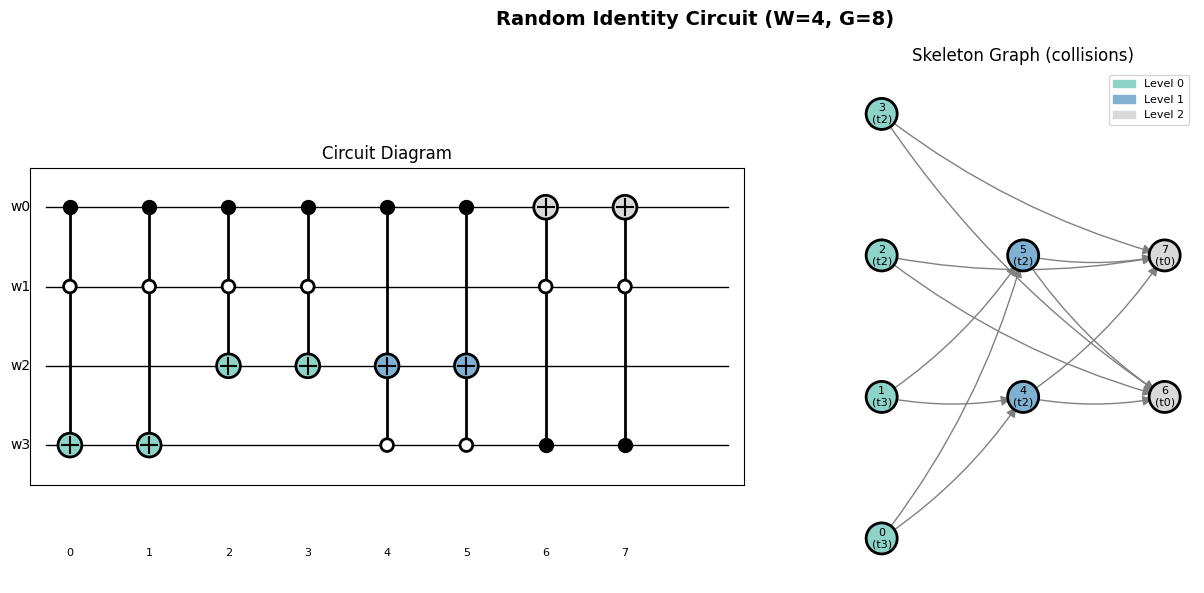

In [10]:
visualize_circuit_and_skeleton(identity, title="Random Identity Circuit (W=4, G=8)")

## 5. Topological Reordering

Push gates left until they collide, creating a more structured layout.

In [11]:
# Create a circuit with interleaved gates
from gates.eca57 import ECA57Circuit

c = ECA57Circuit(4)
# Add gates in a specific order
c.add_gate(0, 1, 2)  # g0
c.add_gate(3, 1, 2)  # g1 - doesn't collide with g0
c.add_gate(0, 2, 3)  # g2 - collides with g0 but not g1
c.add_gate(1, 0, 3)  # g3 - collides with g0, g2

print("Original order:")
for i, g in enumerate(c.gates()):
    print(f"  g{i}: ({g.target}, {g.ctrl1}, {g.ctrl2})")

Original order:
  g0: (0, 1, 2)
  g1: (3, 1, 2)
  g2: (0, 2, 3)
  g3: (1, 0, 3)


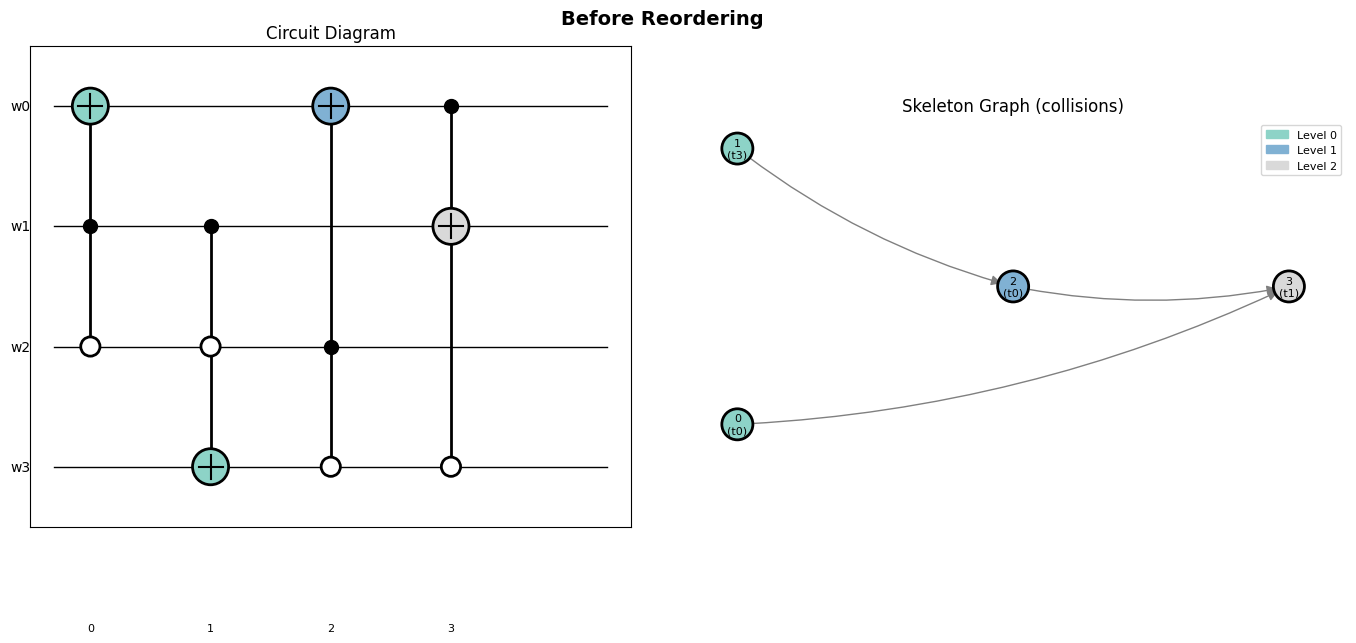

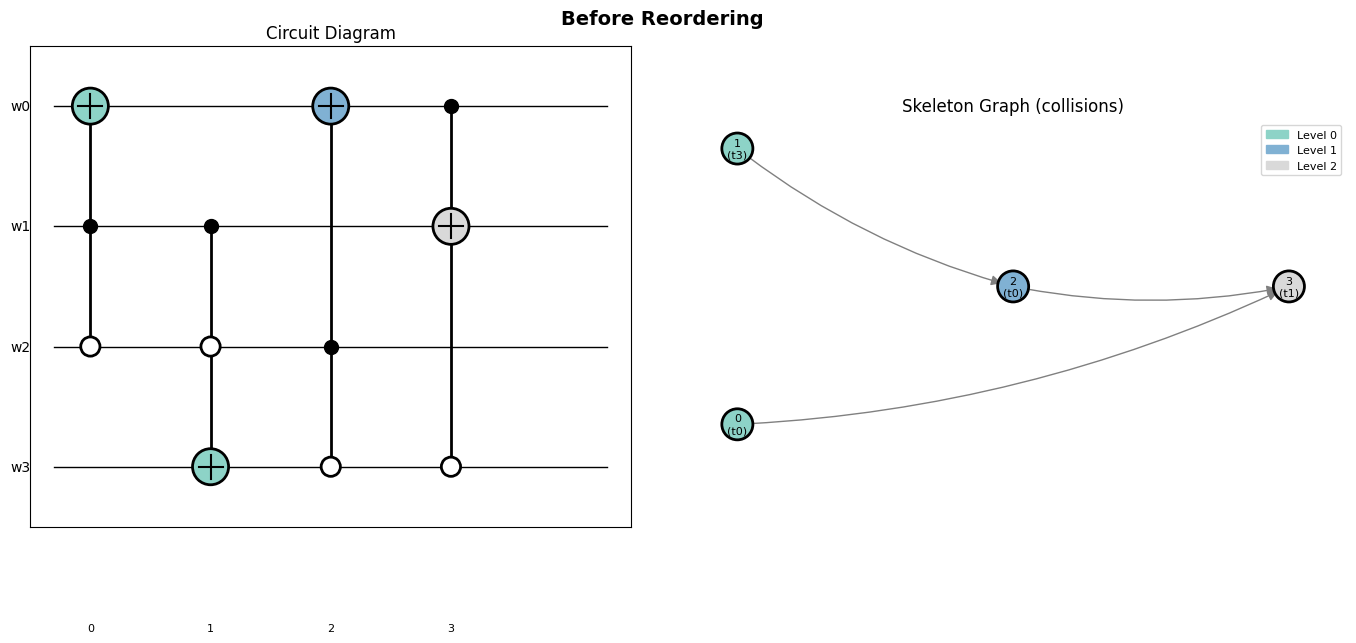

In [12]:
# Show before reordering
visualize_circuit_and_skeleton(c, title="Before Reordering")

In [13]:
# Reorder
order = order_push_left(c)
print(f"New order: {order}")

reordered = reorder_circuit(c, order)
print()
print("Reordered gates:")
for i, g in enumerate(reordered.gates()):
    print(f"  g{i}: ({g.target}, {g.ctrl1}, {g.ctrl2})")

New order: [1, 0, 2, 3]

Reordered gates:
  g0: (3, 1, 2)
  g1: (0, 1, 2)
  g2: (0, 2, 3)
  g3: (1, 0, 3)


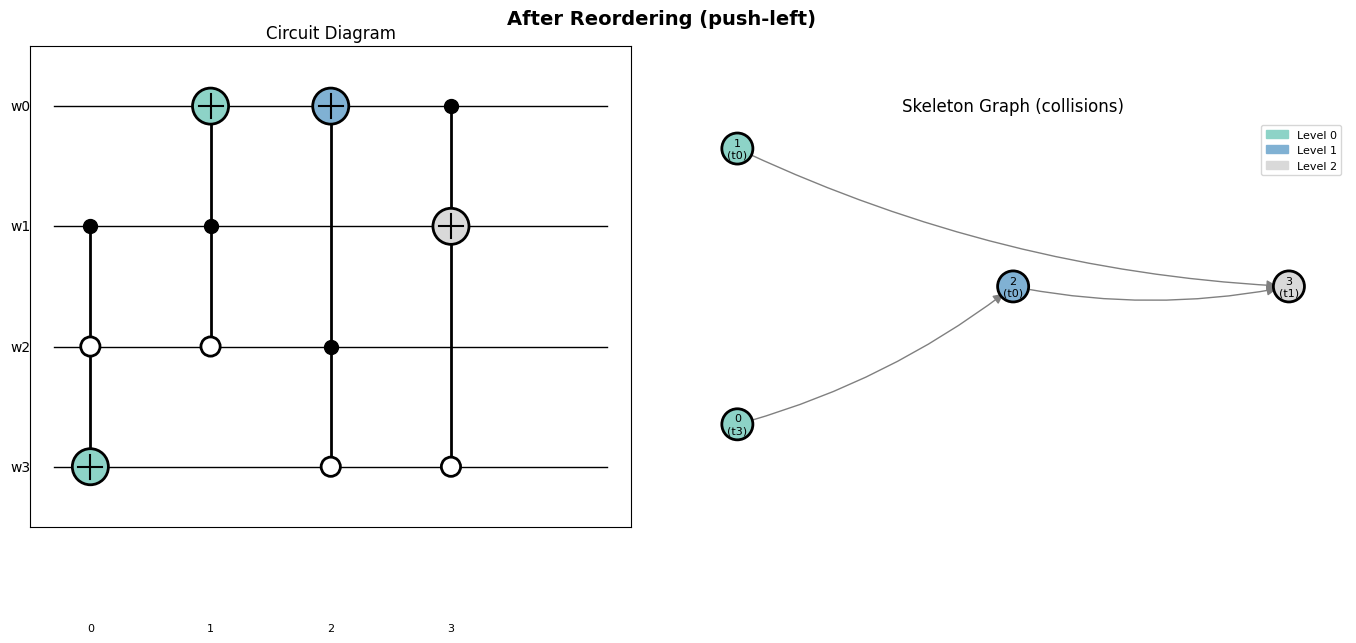

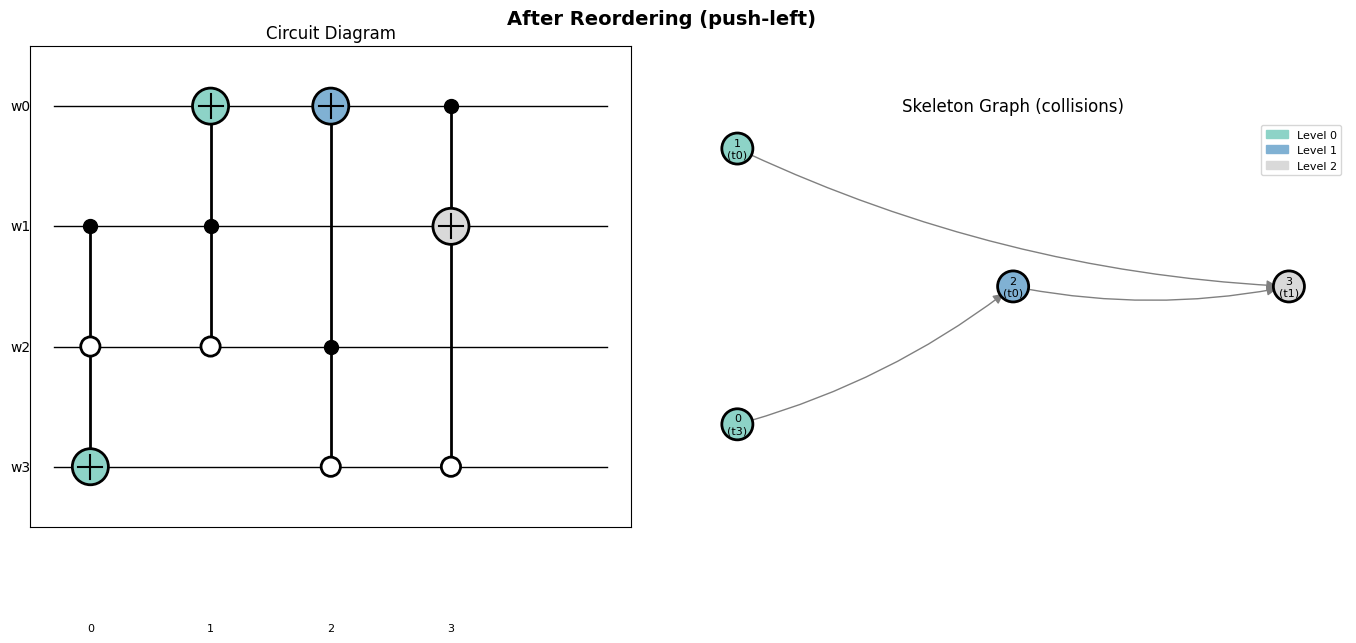

In [14]:
# Show after reordering
visualize_circuit_and_skeleton(reordered, title="After Reordering (push-left)")

In [15]:
# Verify same function
original_tt = c.compute_truth_table()
reordered_tt = reordered.compute_truth_table()
print(f"Same truth table: {original_tt == reordered_tt}")

Same truth table: True


## 6. Large Circuit Example

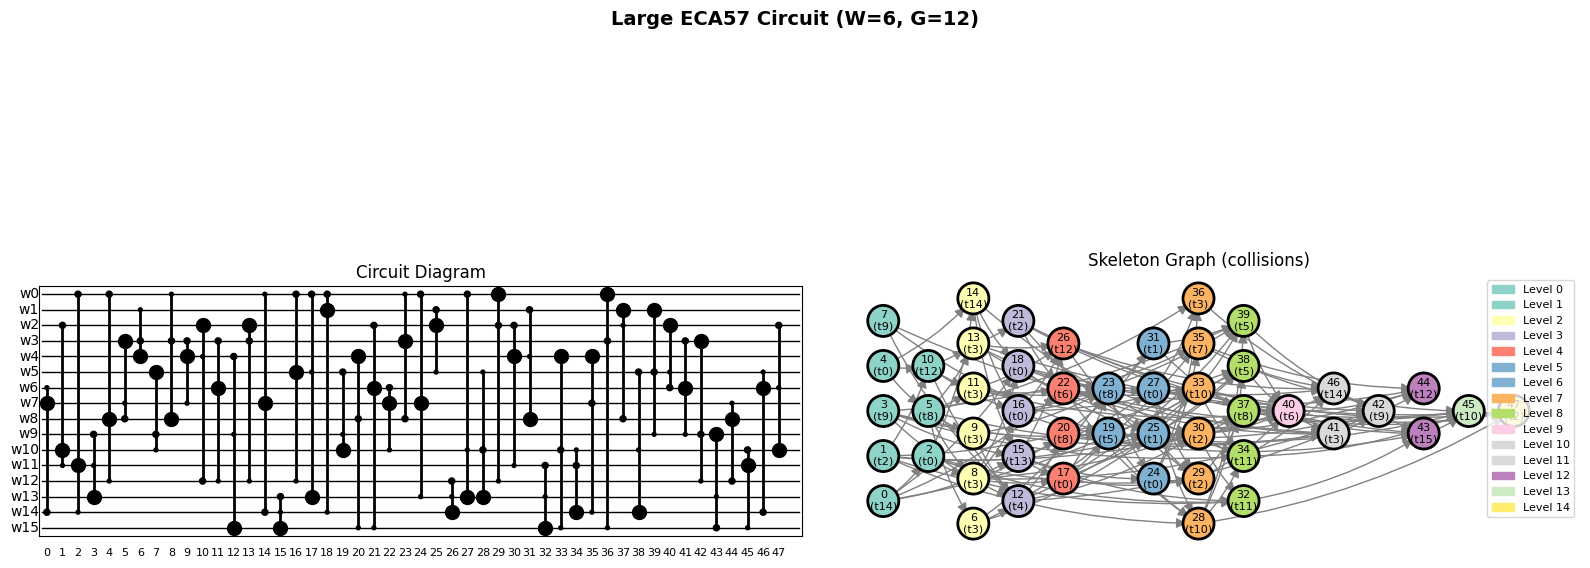

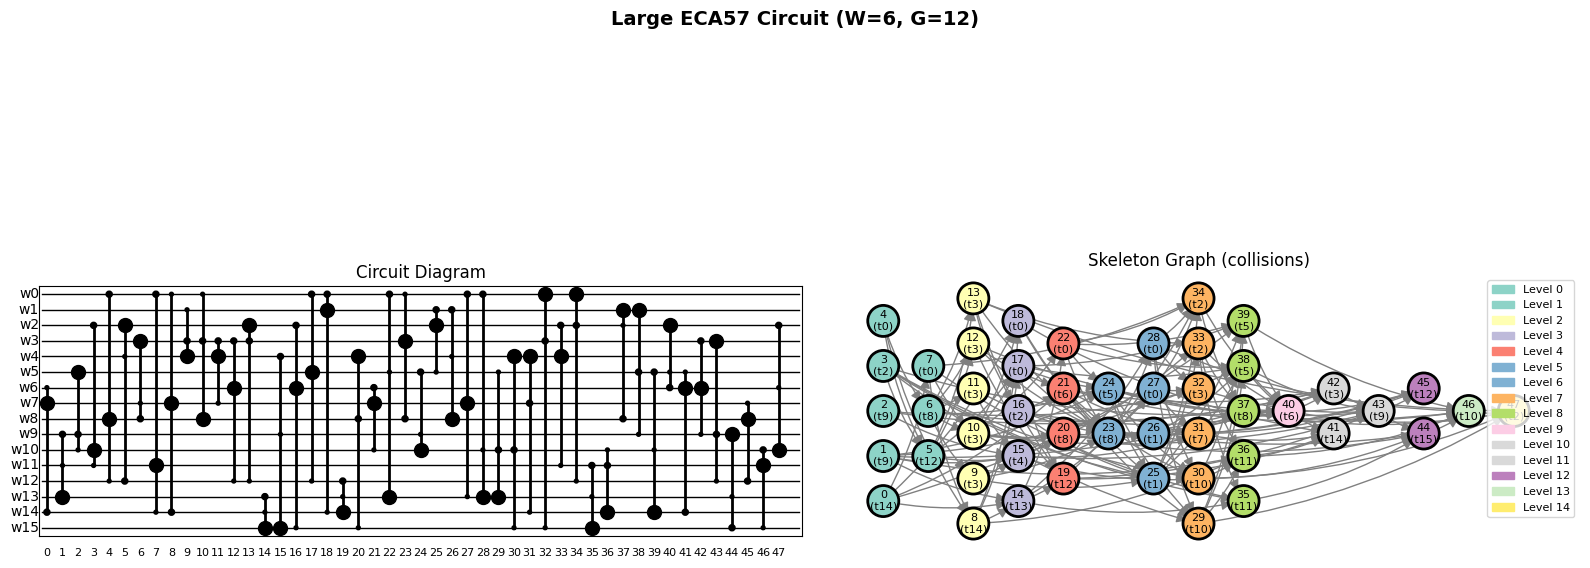

False


In [23]:
# Larger circuit
large_circuit = random_eca57_circuit(width=16, gate_count=48)
order = order_push_left(large_circuit)
visualize_circuit_and_skeleton(large_circuit, 
                               title="Large ECA57 Circuit (W=6, G=12)",
                               figsize=(16, 8))
reordered_circuit = reorder_circuit(large_circuit, order)
visualize_circuit_and_skeleton(reordered_circuit, 
                               title="Large ECA57 Circuit (W=6, G=12)",
                               figsize=(16, 8))

print(reordered_circuit==large_circuit)